# Machine Learning - Classification Algorithms

## Import Libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Import Data

In [2]:
iris = datasets.load_iris()
X = iris.data 
y = iris.target
target_names = iris.target_names
feature_names = iris.feature_names
n_class = len(set(y))
colors = ['b', 'g', 'r']
symbols = ['o', '^', '*']
names = iris.target_names
df = pd.DataFrame(X, columns=iris.feature_names)
df['Class'] = iris.target
df['species'] = df['Class'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])
df = df.rename(columns = {'sepal length (cm)': 'sepal-length', 
           'sepal width (cm)': 'sepal-width', 
           'petal length (cm)': 'petal-length', 
           'petal width (cm)': 'petal-width'
                         })
df.head()

,sepal-length,sepal-width,petal-length,petal-width,Class,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


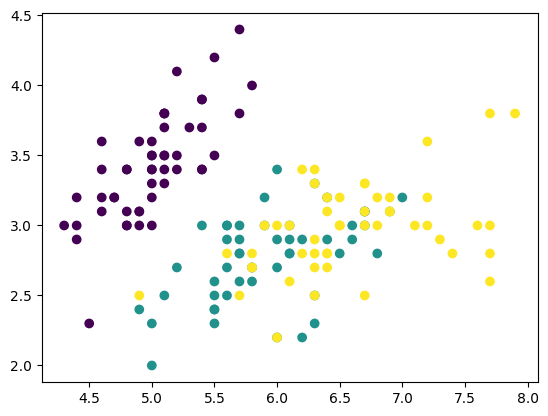

In [3]:
plt.scatter(x=X[:, 0], y=X[:, 1], c=df['Class'])

In [4]:
def plot_decision_boundary(X, y, clf, title = None):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize = (10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    
    for i, c, s in (zip(range(n_class), colors, symbols)):
        ix = y == i
        plt.scatter(X[:, 0][ix], X[:, 1][ix], \
                    color = c, marker = s, s = 60, \
                    label = target_names[i])
    
    if title is not None:
        plt.title(title)
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

## Model Training

In [5]:
X = X[:, 0:2] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20) 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

### KNN Classifier

In [6]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train) 

y_predict = knn.predict(X_test)

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[7 0 0]
 [0 8 3]
 [0 7 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.53      0.73      0.62        11
           2       0.62      0.42      0.50        12

    accuracy                           0.67        30
   macro avg       0.72      0.71      0.71        30
weighted avg       0.68      0.67      0.66        30



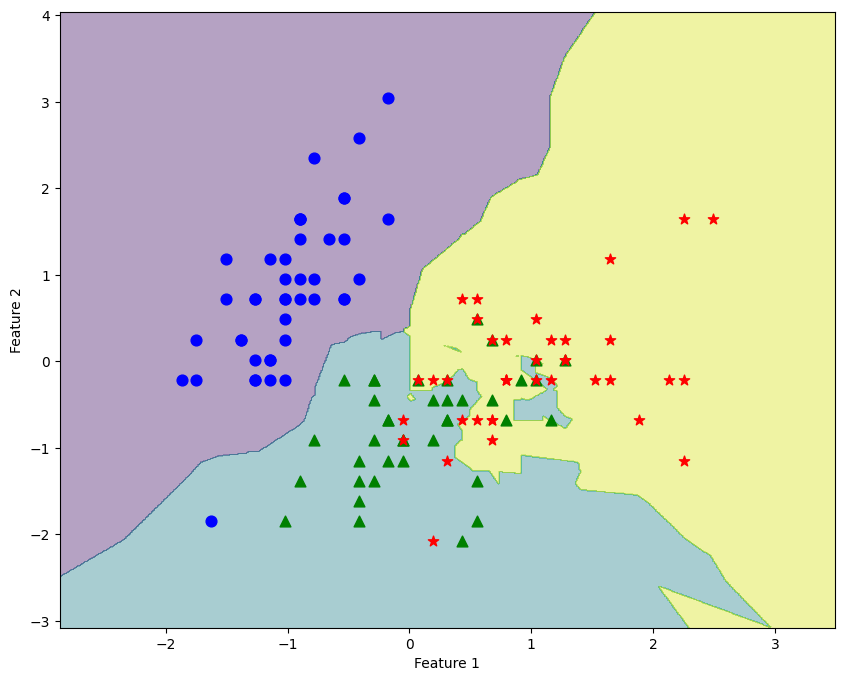

In [7]:
plot_decision_boundary(X_train[:, 0:2], y_train, clf=knn)

### Gaussian Naive Bayes Classifier

In [8]:
gnb = GaussianNB()

model = gnb.fit(X_train, y_train)

y_predict = gnb.predict(X_test)

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[7 0 0]
 [0 7 4]
 [0 8 4]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.47      0.64      0.54        11
           2       0.50      0.33      0.40        12

    accuracy                           0.60        30
   macro avg       0.66      0.66      0.65        30
weighted avg       0.60      0.60      0.59        30



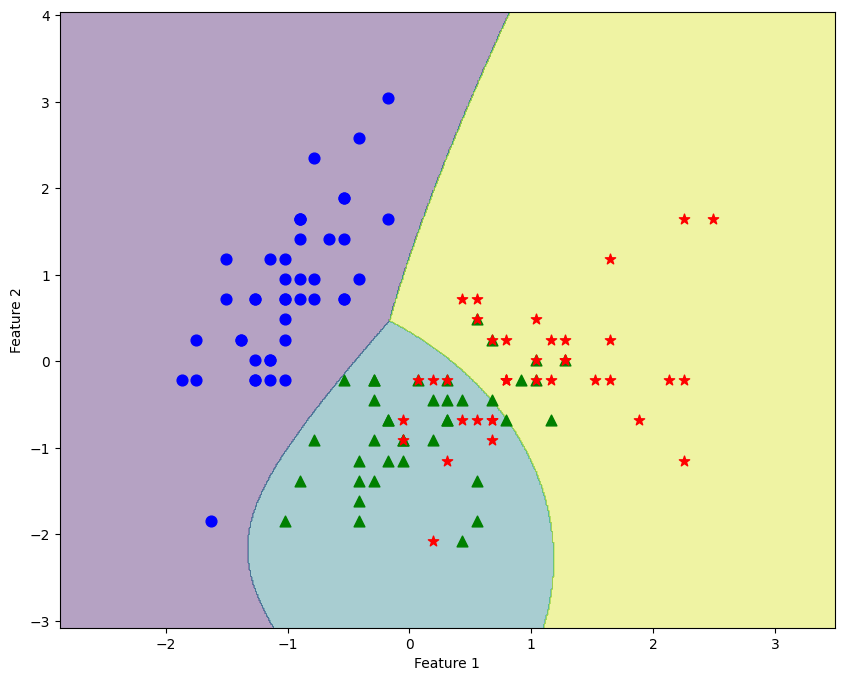

In [9]:
plot_decision_boundary(X_train[:, 0:2], y_train, clf=gnb)

### Random Forest Classifier

In [10]:
rfc = RandomForestClassifier()

model = rfc.fit(X_train, y_train)

y_predict = rfc.predict(X_test)

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[7 0 0]
 [0 7 4]
 [0 7 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.50      0.64      0.56        11
           2       0.56      0.42      0.48        12

    accuracy                           0.63        30
   macro avg       0.69      0.68      0.68        30
weighted avg       0.64      0.63      0.63        30



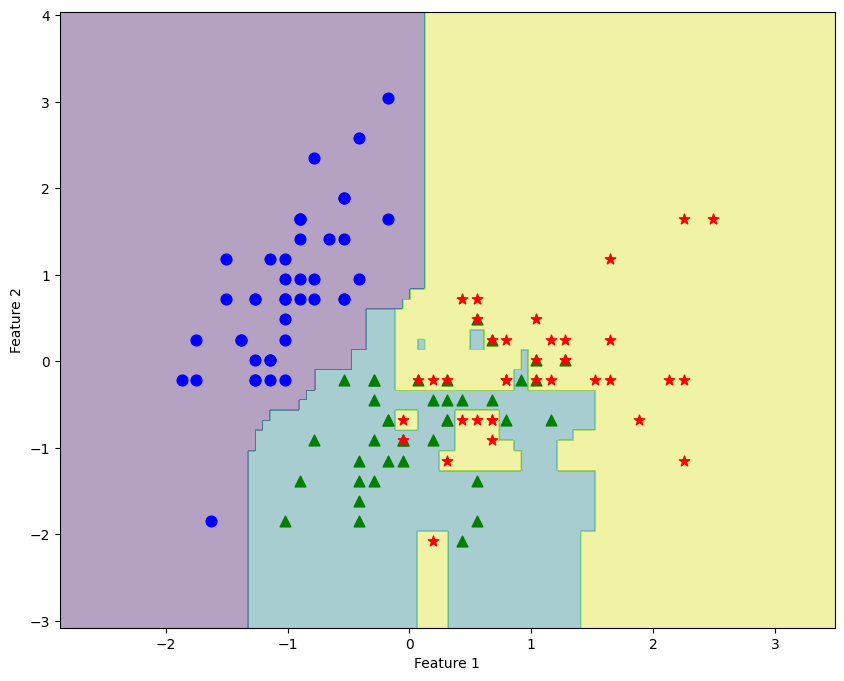

In [11]:
plot_decision_boundary(X_train[:, 0:2], y_train, clf=rfc)

### Support Vector Machine Classifier

In [12]:
svm = svm.SVC(kernel = 'linear')

model = svm.fit(X_train, y_train)

y_predict = svm.predict(X_test)

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[7 0 0]
 [0 6 5]
 [0 7 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.46      0.55      0.50        11
           2       0.50      0.42      0.45        12

    accuracy                           0.60        30
   macro avg       0.65      0.65      0.65        30
weighted avg       0.60      0.60      0.60        30



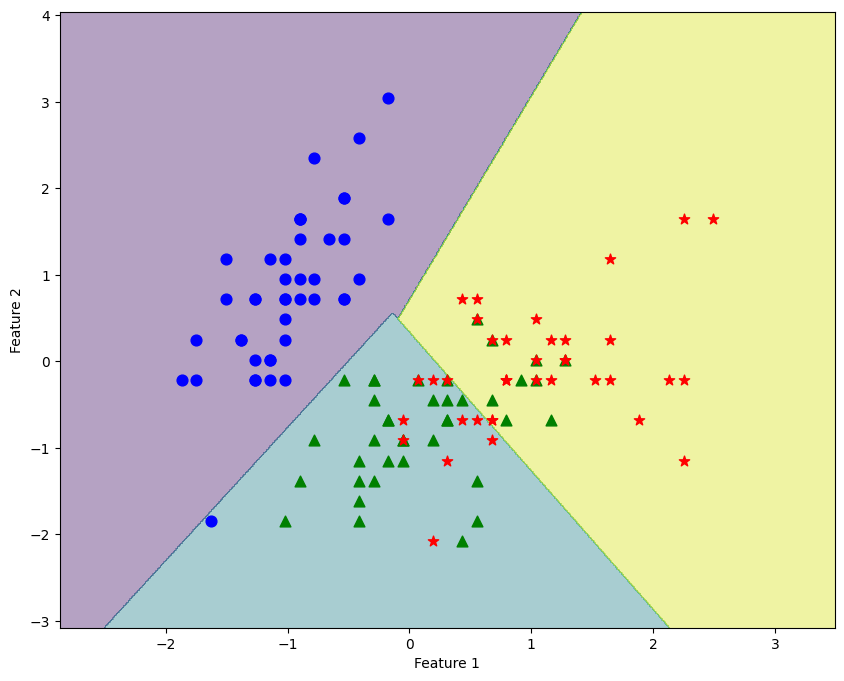

In [13]:
plot_decision_boundary(X_train[:, 0:2], y_train, clf=svm)

### Gradient Boosting Classifier

In [14]:
gbc = GradientBoostingClassifier()

model = gbc.fit(X_train, y_train)

y_predict = gbc.predict(X_test)

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[7 0 0]
 [0 6 5]
 [0 7 5]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.46      0.55      0.50        11
           2       0.50      0.42      0.45        12

    accuracy                           0.60        30
   macro avg       0.65      0.65      0.65        30
weighted avg       0.60      0.60      0.60        30



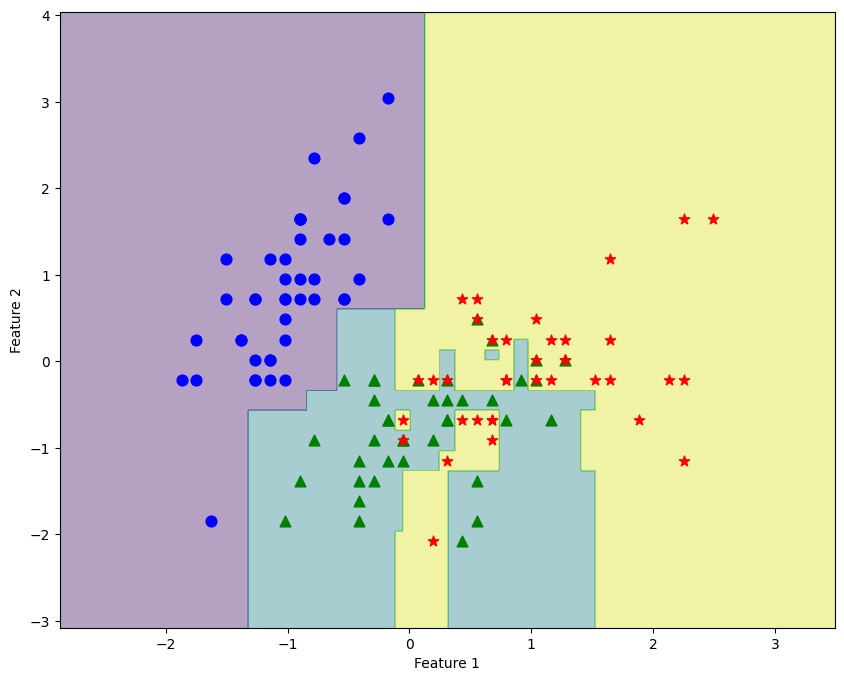

In [15]:
plot_decision_boundary(X_train[:, 0:2], y_train, clf=gbc)